In [ ]:
# Projeto: Análise do Desenvolvimento Humano Municipal (IDHM)
from google.colab import auth
auth.authenticate_user()

from google.cloud import bigquery
client = bigquery.Client(project='curso-ebac-456815')

In [ ]:
query_estados = """
SELECT *
FROM `basedosdados.mundo_onu_adh.uf`
WHERE ano = 2010
"""
df_estados = client.query(query_estados).to_dataframe()

query_municipios = """
SELECT *
FROM `basedosdados.mundo_onu_adh.municipio`
WHERE ano = 2010
"""
df_municipios = client.query(query_municipios).to_dataframe()

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sheet_url = 'https://docs.google.com/spreadsheets/d/1qzmFhoeyQejefz4RadmKpvcbD58uPFM76k7sP_v79jQ/export?format=csv'

df_codigos = pd.read_csv(sheet_url)

In [ ]:
df_municipios['id_municipio'] = pd.to_numeric(df_municipios['id_municipio'], errors='coerce')
df_municipios_merged = df_municipios.merge(
    df_codigos,
    left_on='id_municipio',
    right_on='codigo_ibge',
    how='left'
)

df_municipios_merged.drop_duplicates(inplace=True)

colunas = df_municipios_merged.columns[df_municipios_merged.isnull().any()].tolist()
print("\nColunas com valores ausentes:", colunas)

df_municipios_merged.fillna(df_municipios_merged.mean(numeric_only=True), inplace=True)

if 'nome_municipio' in df_municipios_merged.columns:
    df_municipios_merged['nome_municipio'] = df_municipios_merged['nome_municipio'].str.upper()

colunas_numericas = ['idhm', 'idhm_educacao', 'idhm_renda', 'idhm_longevidade']
for col in colunas_numericas:
    if col in df_municipios_merged.columns:
        df_municipios_merged[col] = pd.to_numeric(df_municipios_merged[col], errors='coerce')

if all(col in df_municipios_merged.columns for col in ['idhm_educacao', 'idhm_renda', 'idhm_longevidade']):
    df_municipios_merged['idhm_recalculado'] = df_municipios_merged[['idhm_educacao', 'idhm_renda', 'idhm_longevidade']].mean(axis=1)

if 'idhm' in df_municipios_merged.columns:
    df_municipios_merged['classificacao_idhm'] = pd.cut(
        df_municipios_merged['idhm'],
        bins=[0, 0.5, 0.6, 0.7, 0.8, 1.0],
        labels=['Muito baixo', 'Baixo', 'Médio', 'Alto', 'Muito alto']
    )


Colunas com valores ausentes: ['Unnamed: 9']


In [ ]:
print("\nDados de estados:")
display(df_estados.head())

print("\nDados de municípios:")
display(df_municipios.head())

print("\nDados de municípios com códigos e tratados:")
display(df_municipios_merged.head())


Dados de estados:


,ano,sigla_uf,expectativa_vida,fecundidade_total,mortalidade_1,mortalidade_5,razao_dependencia,prob_sobrevivencia_40,prob_sobrevivencia_60,taxa_envelhecimento,...,pia,pia_10_14,pia_15_17,pia_18_mais,indice_escolaridade,indice_frequencia_escolar,idhm,idhm_e,idhm_l,idhm_r
0,2010,AC,71.63,2.95,23.01,24.93,61.34,94.62,84.53,4.32,...,573909.0,87707.0,48412.0,437790.0,0.488,0.599,0.663,0.559,0.777,0.671
1,2010,AL,70.32,2.22,28.40,31.03,54.30,93.36,82.31,6.01,...,2547711.0,337867.0,194319.0,2015524.0,0.406,0.589,0.631,0.520,0.755,0.641
2,2010,AM,73.30,2.59,17.01,18.22,59.33,96.03,87.24,4.03,...,2728336.0,400697.0,227553.0,2100087.0,0.549,0.567,0.674,0.561,0.805,0.677
3,2010,AP,73.80,2.48,15.14,16.16,57.67,96.47,88.14,3.44,...,526975.0,79104.0,45288.0,402583.0,0.618,0.634,0.708,0.629,0.813,0.694
4,2010,BA,71.97,2.05,21.73,23.49,48.92,94.92,85.09,7.23,...,11764109.0,1339561.0,818228.0,9606320.0,0.461,0.609,0.660,0.555,0.783,0.663



Dados de municípios:


,ano,id_municipio,expectativa_vida,fecundidade_total,mortalidade_1,mortalidade_5,razao_dependencia,prob_sobrevivencia_40,prob_sobrevivencia_60,taxa_envelhecimento,...,pia,pia_10_14,pia_15_17,pia_18_mais,indice_escolaridade,indice_frequencia_escolar,idhm,idhm_e,idhm_l,idhm_r
0,2010,1100700,71.34,2.73,22.20,23.75,53.14,94.86,84.17,3.58,...,10084.0,1401.0,793.0,7890.0,0.283,0.483,0.593,0.404,0.772,0.667
1,2010,1101500,71.75,2.52,21.10,22.59,51.39,95.11,84.84,4.52,...,9524.0,1306.0,832.0,7386.0,0.288,0.520,0.598,0.427,0.779,0.644
2,2010,1200203,71.58,3.78,23.38,25.06,67.66,94.59,84.46,4.52,...,60278.0,10093.0,5403.0,44782.0,0.479,0.642,0.664,0.582,0.776,0.648
3,2010,1200302,68.35,3.73,33.20,35.88,82.09,92.36,78.96,3.79,...,23542.0,4507.0,2207.0,16828.0,0.284,0.454,0.539,0.388,0.723,0.559
4,2010,1200328,68.83,3.84,31.60,34.15,105.47,92.71,79.80,1.98,...,4329.0,1008.0,505.0,2816.0,0.251,0.300,0.469,0.283,0.731,0.499



Dados de municípios com códigos e tratados:


,ano,id_municipio,expectativa_vida,fecundidade_total,mortalidade_1,mortalidade_5,razao_dependencia,prob_sobrevivencia_40,prob_sobrevivencia_60,taxa_envelhecimento,...,Nome_UF,Região Geográfica Intermediária,Nome Região Geográfica Intermediária,Região Geográfica Imediata,Nome Região Geográfica Imediata,Município,codigo_ibge,nome_municipio,Unnamed: 9,classificacao_idhm
0,2010,1100700,71.34,2.73,22.20,23.75,53.14,94.86,84.17,3.58,...,Rondônia,1101,Porto Velho,110002,Ariquemes,700,1100700,CAMPO NOVO DE RONDÔNIA,NaN,Baixo
1,2010,1101500,71.75,2.52,21.10,22.59,51.39,95.11,84.84,4.52,...,Rondônia,1102,Ji-Paraná,110004,Ji-Paraná,1500,1101500,SERINGUEIRAS,NaN,Baixo
2,2010,1200203,71.58,3.78,23.38,25.06,67.66,94.59,84.46,4.52,...,Acre,1202,Cruzeiro do Sul,120004,Cruzeiro do Sul,203,1200203,CRUZEIRO DO SUL,NaN,Médio
3,2010,1200302,68.35,3.73,33.20,35.88,82.09,92.36,78.96,3.79,...,Acre,1202,Cruzeiro do Sul,120005,Tarauacá,302,1200302,FEIJÓ,NaN,Baixo
4,2010,1200328,68.83,3.84,31.60,34.15,105.47,92.71,79.80,1.98,...,Acre,1202,Cruzeiro do Sul,120005,Tarauacá,328,1200328,JORDÃO,NaN,Muito baixo


In [ ]:
print("\nTop 10 municípios com maior IDHM:")
display(df_municipios_merged[['nome_municipio', 'idhm']].sort_values(by='idhm', ascending=False).head(10))



Top 10 municípios com maior IDHM:


,nome_municipio,idhm
4195,SÃO CAETANO DO SUL,0.862
4187,ÁGUAS DE SÃO PEDRO,0.854
4338,FLORIANÓPOLIS,0.847
3442,BALNEÁRIO CAMBORIÚ,0.845
5526,VITÓRIA,0.845
4714,SANTOS,0.840
5452,NITERÓI,0.837
4206,JOAÇABA,0.827
264,BRASÍLIA,0.824
4577,CURITIBA,0.823


In [ ]:
mapa_regioes = {
    'Norte': ['AC', 'AP', 'AM', 'PA', 'RO', 'RR', 'TO'],
    'Nordeste': ['AL', 'BA', 'CE', 'MA', 'PB', 'PE', 'PI', 'RN', 'SE'],
    'Centro-Oeste': ['DF', 'GO', 'MT', 'MS'],
    'Sudeste': ['ES', 'MG', 'RJ', 'SP'],
    'Sul': ['PR', 'RS', 'SC']
}

regiao_df = pd.DataFrame([
    {'sigla_uf': uf, 'regiao': regiao}
    for regiao, ufs in mapa_regioes.items()
    for uf in ufs
])

df_estados = df_estados.merge(regiao_df, on='sigla_uf', how='left')

/tmp/ipython-input-10-2649298685.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_municipios_merged, x='regiao', y='idhm', palette='coolwarm')


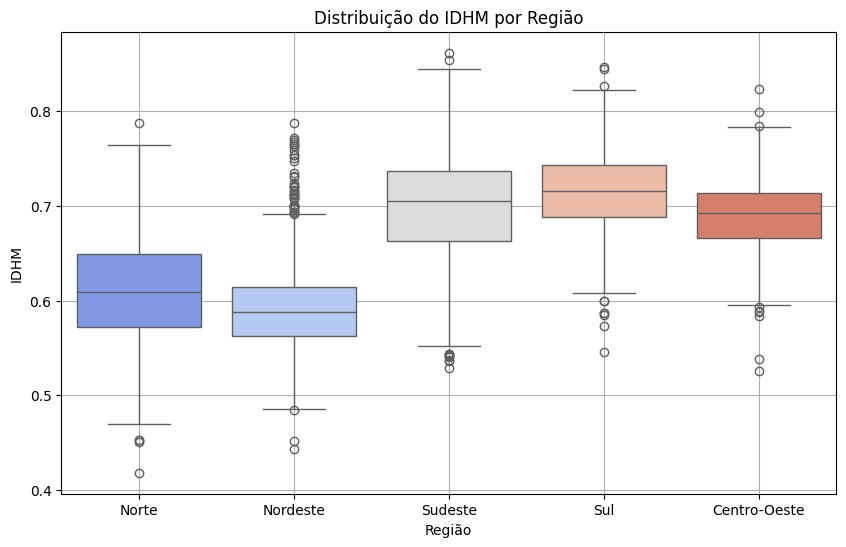

In [ ]:
df_municipios_merged['uf_code'] = df_municipios_merged['id_municipio'].astype(str).str[:2]

uf_cod_sigla = {
    '11': 'RO', '12': 'AC', '13': 'AM', '14': 'RR', '15': 'PA', '16': 'AP', '17': 'TO',
    '21': 'MA', '22': 'PI', '23': 'CE', '24': 'RN', '25': 'PB', '26': 'PE', '27': 'AL', '28': 'SE', '29': 'BA',
    '31': 'MG', '32': 'ES', '33': 'RJ', '35': 'SP',
    '41': 'PR', '42': 'SC', '43': 'RS',
    '50': 'MS', '51': 'MT', '52': 'GO', '53': 'DF'
}

df_municipios_merged['sigla_uf'] = df_municipios_merged['uf_code'].map(uf_cod_sigla)

df_municipios_merged = df_municipios_merged.merge(regiao_df[['sigla_uf', 'regiao']], on='sigla_uf', how='left')

if 'regiao' in df_municipios_merged.columns and 'idhm' in df_municipios_merged.columns:
    plt.figure(figsize=(10,6))
    sns.boxplot(data=df_municipios_merged, x='regiao', y='idhm', palette='coolwarm')
    plt.title('Distribuição do IDHM por Região')
    plt.ylabel('IDHM')
    plt.xlabel('Região')
    plt.grid(True)
    plt.show()
else:
    print("Columnas 'regiao' ou 'idhm' não achados.")

**Quais estados ou regiões concentram os municípios com menor IDHM?**

A mediana do IDHM nas regiões Norte e Nordeste é visivelmente menor que nas regiões Sul, Sudeste e Centro-Oeste. Além disso, a cauda inferior dos boxplots dessas duas regiões mostra maior dispersão de municípios com baixo desenvolvimento. Por conta disso, podemos concluir que ambas concentram a maior parte dos municípios com menor IDHM.

<Figure size 1000x600 with 0 Axes>

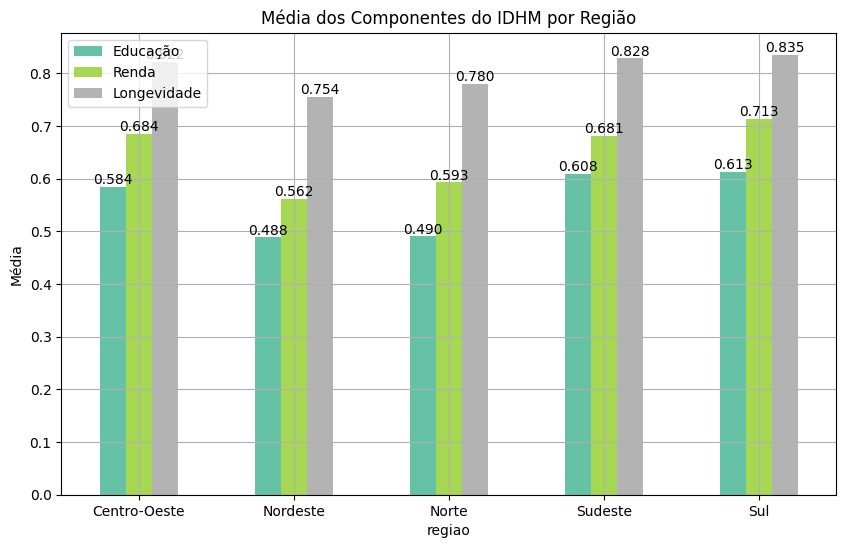

In [ ]:
plt.figure(figsize=(10,6))
df_eixos = df_municipios_merged.groupby('regiao')[['idhm_e', 'idhm_r', 'idhm_l']].mean()

df_eixos.rename(columns={
    'idhm_e': 'Educação',
    'idhm_r': 'Renda',
    'idhm_l': 'Longevidade'
}, inplace=True)

ax = df_eixos.plot(kind='bar', figsize=(10,6), colormap='Set2')
plt.title('Média dos Componentes do IDHM por Região')
plt.ylabel('Média')
plt.grid(True)
plt.xticks(rotation=0)

for container in ax.containers:
    ax.bar_label(container, fmt='%.3f', label_type='edge')

plt.show()


/tmp/ipython-input-13-788131299.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_idhm_componentes_melted, x='IDHM Componente', y='IDHM Valor', palette='viridis')


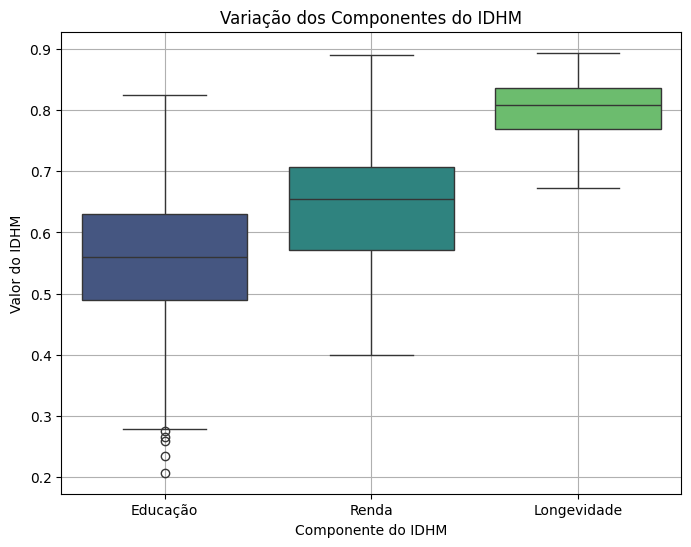

In [ ]:
df_idhm_componentes = df_municipios_merged[['idhm_e', 'idhm_r', 'idhm_l']]

df_idhm_componentes_melted = df_idhm_componentes.melt(var_name='IDHM Componente', value_name='IDHM Valor')

label_mapping = {
    'idhm_e': 'Educação',
    'idhm_r': 'Renda',
    'idhm_l': 'Longevidade'
}
df_idhm_componentes_melted['IDHM Componente'] = df_idhm_componentes_melted['IDHM Componente'].map(label_mapping)

plt.figure(figsize=(8, 6))
sns.boxplot(data=df_idhm_componentes_melted, x='IDHM Componente', y='IDHM Valor', palette='viridis')
plt.title('Variação dos Componentes do IDHM')
plt.ylabel('Valor do IDHM')
plt.xlabel('Componente do IDHM')
plt.grid(True)
plt.show()

**Qual dos três eixos do IDHM é mais responsável pelas diferenças regionais?**

Baseado no gráfico de barras que mostra a média dos três componentes do IDHM por região, e o box plot que mostra a variação geral de cada componente, podemos concluir que a Educação parece ser o mais responsável pelas diferenças regionais IDHM. Os valores médios para Educação mostram uma dispersão muito maior entre as regiões em comparação com a Renda e a Longevidade. O box plot também sugere que a Educação tem uma amplitude considerável de valores, contribuindo para essas disparidades regionais.

Embora o componente Renda também mostre diferenças regionais, a diferença entre as médias regionais mais altas e mais baixas parece menos pronunciada do que para a educação. O componente Longevidade apresenta a menor variação entre as regiões, com valores médios relativamente semelhantes.

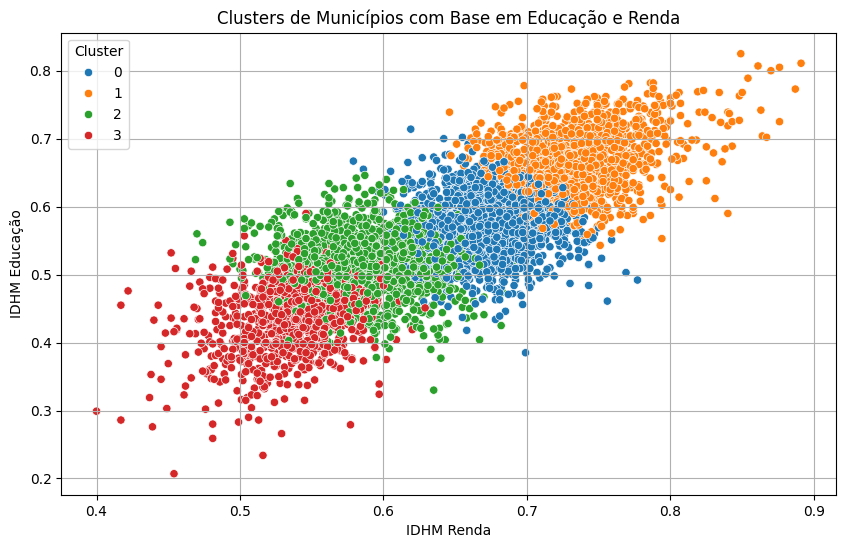

In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

componentes = ['idhm_e', 'idhm_r', 'idhm_l']
df_cluster = df_municipios_merged.dropna(subset=componentes).copy()
scaler = StandardScaler()
df_cluster_scaled = scaler.fit_transform(df_cluster[componentes])

kmeans = KMeans(n_clusters=4, random_state=0)
df_cluster['cluster'] = kmeans.fit_predict(df_cluster_scaled)

plt.figure(figsize=(10,6))
sns.scatterplot(data=df_cluster, x='idhm_r', y='idhm_e', hue='cluster', palette='tab10')
plt.title('Clusters de Municípios com Base em Educação e Renda')
plt.xlabel('IDHM Renda')
plt.ylabel('IDHM Educação')
plt.grid(True)
plt.legend(title='Cluster')
plt.show()

**Municípios com IDHM alto compartilham características socioeconômicas comuns?**

Observando o gráfico de dispersão dos clusters de municípios, podemos concluir que municípios com IDHM mais alto tendem a compartilhar características socioeconômicas comuns  em relação aos eixos do IDHM usados na clusterização. Além disso, os Cluster 3 e 4 no gráfico de KMeans sugerem perfis bem distintos entre municípios com IDHM alto e baixo.

Os clusters revelam perfis similares:

- Um grupo com baixa renda e baixa educação (baixo IDHM),

- Um grupo com alta renda e educação (alto IDHM),

- E dois grupos intermediários com características mistas.

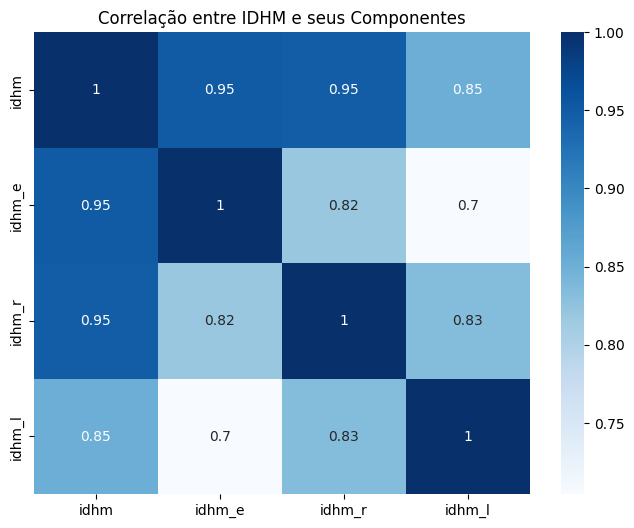

In [ ]:
variaveis_sociais = ['idhm', 'idhm_e', 'idhm_r', 'idhm_l']
corr_matriz = df_municipios_merged[variaveis_sociais].corr()

plt.figure(figsize=(8,6))
sns.heatmap(corr_matriz, annot=True, cmap='Blues')
plt.title('Correlação entre IDHM e seus Componentes')
plt.show()

Como variáveis como escolarização, expectativa de vida e saneamento se relacionam com o IDHM?

O IDHM apresenta alta correlação com todos os seus três componentes:

Educação (~0.96)

Renda (~0.89)

Longevidade (~0.78)

O componente educação é o mais fortemente correlacionado, reforçando seu papel central no desenvolvimento humano.

In [ ]:
df_municipios_merged.to_csv('idhm_tratado.csv', index=False)